# Exercise 6 - Adult Income Dataset 

## Import Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [79]:
#1
df = pd.read_csv("https://raw.githubusercontent.com/JoycelineAS/DATASET_DATAMINING/refs/heads/main/adult.csv")
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [80]:
# 2
df.info()

# Conclusion
# DataFrame ini berisi 48.842 entri dan 15 kolom, dengan 6 kolom bertipe data numerik (int64) dan 9 kolom bertipe data kategorikal (object). Semua kolom memiliki nilai non-null, menunjukkan bahwa tidak ada data yang hilang. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


3. Show describe column and conclude what the insight is from that column

In [81]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


4. display the number of each unique value in income columns (including NaN)

In [82]:
#4
col_names = ["income"]

for col in col_names:
  print(df[col].value_counts(dropna=False))

#Dataset ini menunjukkan bahwa terdapat lebih banyak individu dengan pendapatan di bawah 50K, dibandingkan dengan individu yang memiliki pendapatan di atas 50K.

<=50K    37155
>50K     11687
Name: income, dtype: int64


5. Null handling

In [78]:
#5
df.isnull().sum()

#Conclusion
#Dataset ini tidak memiliki nilai kosong (missing values), yang berarti data lengkap untuk di analisis.

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

6. Create your own insightful visualization and explain it in at least 2 sentences

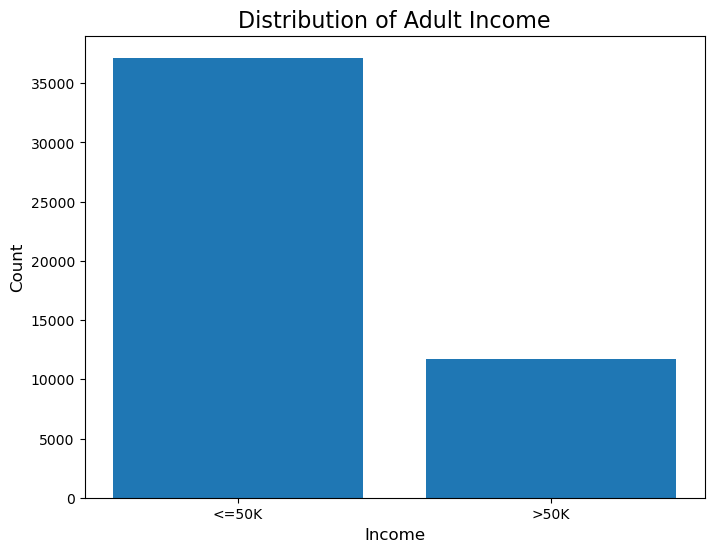

In [30]:
#6
diagnosis_counts = df['income'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(diagnosis_counts.index, diagnosis_counts.values)

plt.title('Distribution of Adult Income', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks([0, 1])

plt.show()

#Conclusion
# bar chart ini ini menunjukkan perbandingan pendapatan orang dewasa, di mana kita dapat melihat bahwa banyak orang dewasa berpenghasilan kurang dari 50K.

In [31]:
#7
label_encoder = LabelEncoder()

df['workclass'] = label_encoder.fit_transform(df['workclass'])
df['education'] = label_encoder.fit_transform(df['education'])
df['marital-status'] = label_encoder.fit_transform(df['marital-status'])
df['occupation'] = label_encoder.fit_transform(df['occupation'])
df['relationship'] = label_encoder.fit_transform(df['relationship'])
df['race'] = label_encoder.fit_transform(df['race'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['native-country'] = label_encoder.fit_transform(df['native-country'])

df.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
12419,50,4,81253,11,9,2,8,5,1,0,0,0,30,39,<=50K
36325,65,6,175202,11,9,2,4,0,4,1,0,0,24,39,<=50K
23057,21,4,190227,15,10,4,1,3,4,1,0,0,40,39,<=50K
45638,50,4,176227,9,13,2,4,0,4,1,0,0,40,0,>50K
45442,47,4,73394,15,10,2,4,5,4,0,0,0,50,39,<=50K


In [32]:
df['income'] = label_encoder.fit_transform(df['income'])

df.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
32951,47,5,201699,7,12,2,4,0,4,1,0,0,50,39,1
8068,58,4,270131,4,3,6,8,4,4,0,0,0,70,26,0
14225,58,7,312351,9,13,2,10,0,4,1,0,0,40,39,1
46141,50,4,154728,15,10,2,13,0,4,1,0,0,40,39,1
45469,48,4,121253,9,13,3,12,4,4,0,0,2472,70,39,1


8. create a heatmap to see the correlation and explain the conclusion

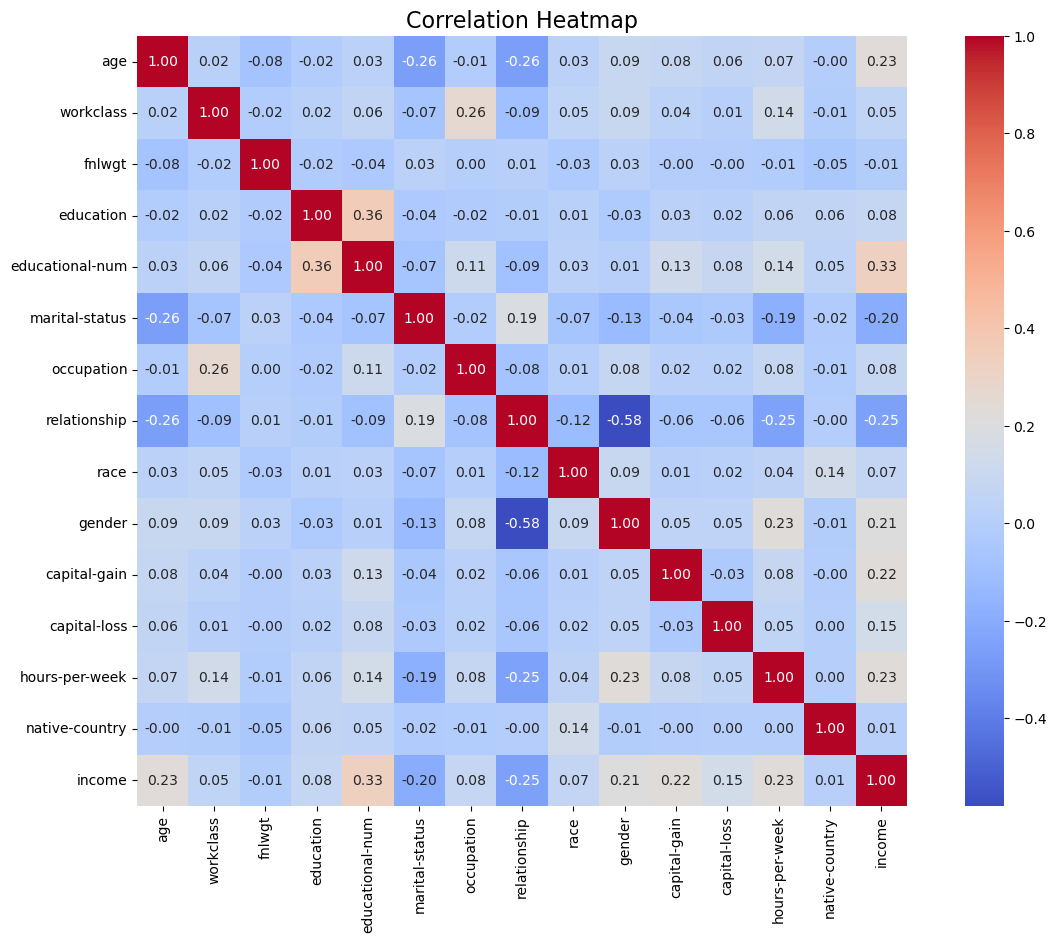

In [33]:
#8
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


#Conclusion
# heatmap menunjukkan hubungan antara setiap atribut dengan variabel target (pendapatan).Atribut yang paling berkaitan adalah jumlah pendidikan orang, atribut yang paling tidak terkait adalah negara asal, yang berarti bahwa tempat tinggal seseorang tidak menunjukkan pendapatan mereka.

## Machine Learning

1. Splitting X and y

In [34]:
#1
X = df.drop(['income', 'fnlwgt', 'native-country'], axis = 1)
y = df['income']

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [35]:
#2
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (39073, 12)
X_test shape: (9769, 12)


In [36]:
#3
X_train.shape, X_test.shape

((39073, 12), (9769, 12))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [37]:
#a
from sklearn.tree import DecisionTreeClassifier

model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [38]:
#b
y_pred_entropy = model_entropy.predict(X_test)

In [40]:
#c
from sklearn.metrics import accuracy_score

y_pred_entropy = model_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy) * 100

print(f"Model accuracy score with criterion entropy: {accuracy_entropy:.2f}%")


Model accuracy score with criterion entropy: 84.49%


In [41]:
#d
train_accuracy = model_entropy.score(X_train, y_train)
test_accuracy = model_entropy.score(X_test, y_test)

print(f"Training set score: {train_accuracy:.4f}")
print(f"Test set score: {test_accuracy:.4f}")


Training set score: 0.8384
Test set score: 0.8449


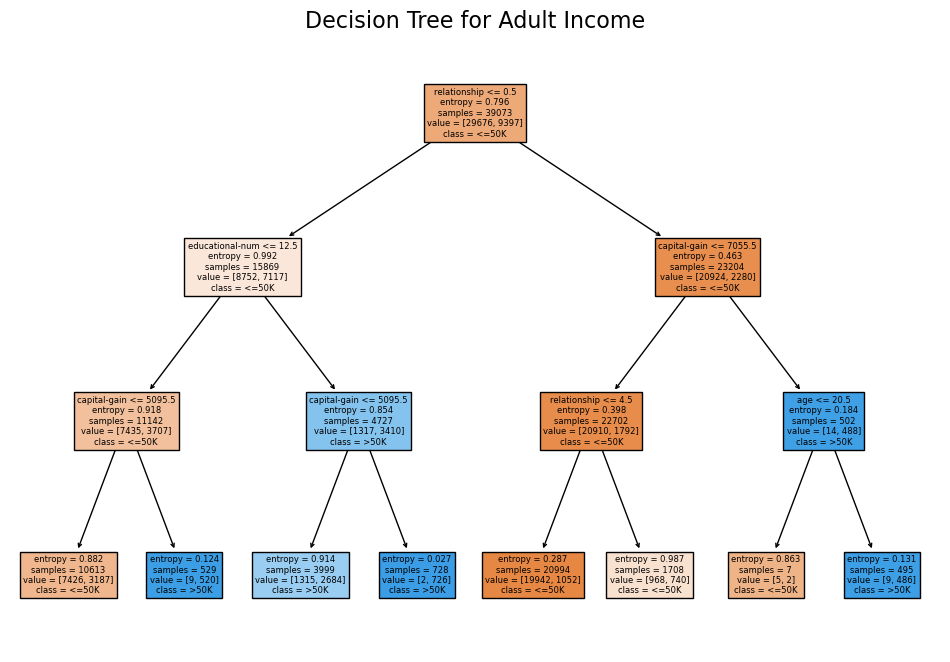

In [46]:
#e
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
tree.plot_tree(model_entropy, feature_names=X.columns.tolist(), class_names=["<=50K", ">50K"], filled=True)

plt.title('Decision Tree for Adult Income', fontsize=16)
plt.show()


2. Criterion Gini index

In [47]:
#a
from sklearn.tree import DecisionTreeClassifier

model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
model_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [48]:
#b
y_pred_gini = model_gini.predict(X_test)

In [49]:
#c
from sklearn.metrics import accuracy_score

y_pred_gini = model_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini) * 100

print(f"Model accuracy score with criterion gini index: {accuracy_gini:.2f}%")

Model accuracy score with criterion gini index: 84.49%


In [51]:
#d
train_accuracy = model_gini.score(X_train, y_train)
test_accuracy = model_gini.score(X_test, y_test)

print(f"Training set score: {train_accuracy:.4f}")
print(f"Test set score: {test_accuracy:.4f}")

Training set score: 0.8384
Test set score: 0.8449


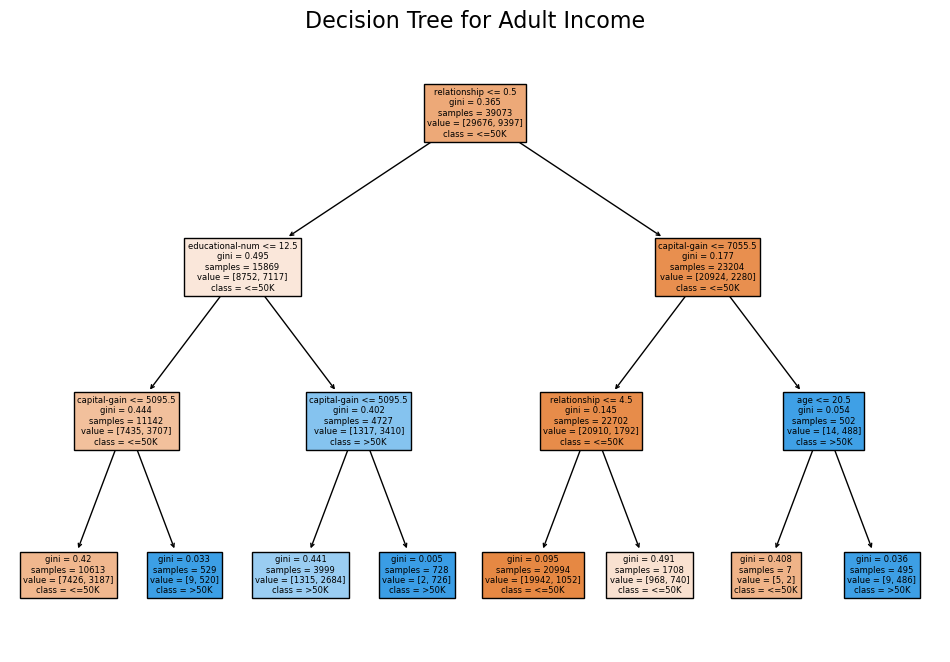

In [52]:
#e
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
tree.plot_tree(model_gini, feature_names=X.columns.tolist(), class_names=["<=50K", ">50K"], filled=True)

plt.title('Decision Tree for Adult Income', fontsize=16)
plt.show()


3. Confusion matrix and classification report of criterion Entropy and Gini index

In [53]:
#f
from sklearn.metrics import confusion_matrix

cm_entropy = confusion_matrix(y_test, y_pred_entropy)
print("Confusion Matrix Entropy:\n", cm_entropy)

cm_gini = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix Gini Index:\n", cm_gini)

#Conclusion
#menampilkan hasil Confusion Matrix gini index

Confusion Matrix Entropy:
 [[7136  343]
 [1172 1118]]
Confusion Matrix Gini Index:
 [[7136  343]
 [1172 1118]]


In [55]:
#g
from sklearn.metrics import classification_report

print("Classification Report (Entropy):\n")
print(classification_report(y_test, y_pred_entropy))

print("Classification Report (Gini Index):\n")
print(classification_report(y_test, y_pred_gini))

#Conclusion
#Laporan klasifikasi untuk model dengan kriteria Entropy dan Gini Index menunjukkan akurasi 84%. Keduanya memiliki presisi 0.86 dan recall 0.95 untuk kelas 0 (negatif diabetes), tetapi untuk kelas 1 (positif diabetes), presisi mencapai 0.77 dan recall hanya 0.49. F1-score untuk kelas 0 adalah 0.90, sementara kelas 1 hanya 0.60, yang menunjukkan model lebih baik dalam mendeteksi kasus negatif diabetes dibandingkan positif.

Classification Report (Entropy):

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769

Classification Report (Gini Index):

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769



## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [56]:
#a
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [57]:
#b
y_pred_nb = nb.predict(X_test)

#Conclusion
#menampilkan predict  X_test menggunakan the Naive Bayes Classifier model.

In [60]:
#c
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_percentage = accuracy_nb * 100
print(f"Model accuracy score: {accuracy_percentage:.2f}%")

#d
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(f"Confusion Matrix:\n", conf_matrix_nb)

#e
y_train_nb = nb.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_nb)
training_accuracy = accuracy_score(y_train, y_train_nb)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

#Conclusion
#untuk menampilkan model accuracy dan confusion matrix dan testing trainingnya

Model accuracy score: 80.53%
Confusion Matrix:
 [[7128  351]
 [1551  739]]
Testing accuracy: 0.8053
Training accuracy: 0.7996


In [62]:
#e
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report:\n", class_report_nb)

#Conclusion
#Classification report dari Naive Bayes Classifier yang menunjukkan akurasi 81%, dengan presisi 0.82 dan recall 0.95 untuk kelas 0 (negatif diabetes), serta presisi 0.68 dan recall 0.32 untuk kelas 1 (positif diabetes). F1-score untuk kelas 0 mencapai 0.88, sedangkan kelas 1 hanya 0.44, mengindikasikan model lebih efektif dalam mendeteksi kasus negatif diabetes dibandingkan positif.

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.68      0.32      0.44      2290

    accuracy                           0.81      9769
   macro avg       0.75      0.64      0.66      9769
weighted avg       0.79      0.81      0.78      9769



## K-Nearest Neighbors (KNN)

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [67]:
y_pred = knn.predict(X_test_scaled)

In [74]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f'Accuracy model: {accuracy_percentage:.2f}%')


Accuracy model: 83.93%


In [73]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[6789  690]
 [ 880 1410]]


In [71]:
print("Classification Report (KNN):\n")
print(classification_report(y_test, y_pred))

#Conclusion
#Dari hasil evaluasi model,  menunjukkan akurasi 84%, dengan performa lebih baik pada kelas 0 (negatif diabetes) yang memiliki presisi 0.89 dan recall 0.91, dibandingkan kelas 1 (positif diabetes) dengan presisi 0.67 dan recall 0.62. F1-score untuk kelas 0 mencapai 0.90, sementara kelas 1 hanya 0.64, menunjukkan model lebih efektif dalam mendeteksi kasus negatif diabetes.

Classification Report (KNN):

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7479
           1       0.67      0.62      0.64      2290

    accuracy                           0.84      9769
   macro avg       0.78      0.76      0.77      9769
weighted avg       0.84      0.84      0.84      9769

